<a href="https://colab.research.google.com/github/Josh-XS/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project1 - Part1

Joshua Nickell

##Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR0TKEXKL-l0SVSGCehXIONnm0wttSHcPqgVceF7dUXcrrk1ClRQXGNCDFm0qWIfNrbCV6uuXWxh9P5/pub?gid=1274198617&single=true&output=csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

####How any rows and Columns?

In [5]:
df.shape

(8523, 12)

8523 rows, and 12 columns

####Data Types

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

####Identify Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates

####Check for missing values

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Determine unique values

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Find mean and counts of Item_Weight

In [10]:
df['Item_Weight'].mean()

12.857645184135976

In [11]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

#### Find values of Outlet_Size

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

####Edit Missing Values

I decided to drop the item weight, as it does not seem relevant to sales

In [13]:
df.drop(columns='Item_Weight', inplace=True)

I decided to change the outlet size to medium because it was the most common in the data set

In [14]:
df['Outlet_Size'].fillna('Medium', inplace=True)

There are no more missing values

In [15]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Check For Inconsistencies

In [16]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [19]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [20]:
df['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [21]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [22]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [23]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [25]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [26]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

#### Fix Inconsistencies

In [27]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')

In [28]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [29]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Summary Stats Of Numerical Columns

In [31]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Visuals

#### Histograms

Here are some histograms to find the distribution of important values

([0, 1], <a list of 2 Text major ticklabel objects>)

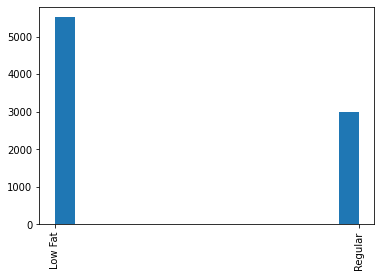

In [32]:
plt.hist(data = df, x = "Item_Fat_Content", bins = 'auto')
plt.xticks(rotation = 90)

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 9 Text major ticklabel objects>)

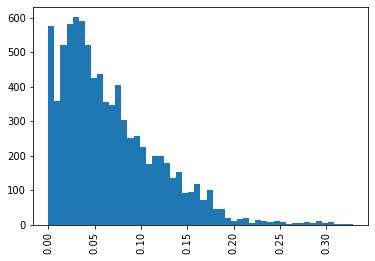

In [33]:
plt.hist(data = df, x = "Item_Visibility", bins = 'auto')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

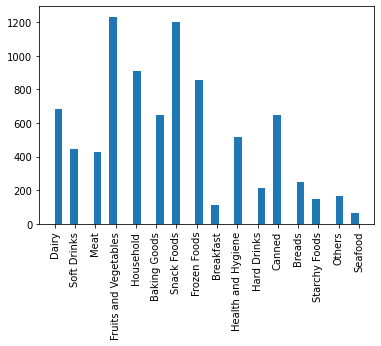

In [34]:
plt.hist(data = df, x = "Item_Type", bins = 'auto')
plt.xticks(rotation = 90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

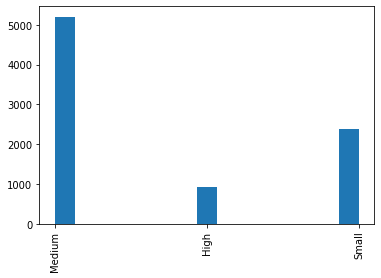

In [35]:
plt.hist(data = df, x = "Outlet_Size", bins = 'auto')
plt.xticks(rotation = 90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

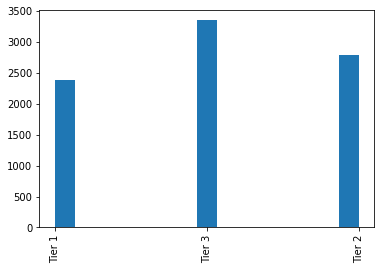

In [36]:
plt.hist(data = df, x = "Outlet_Location_Type", bins = 'auto')
plt.xticks(rotation = 90)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

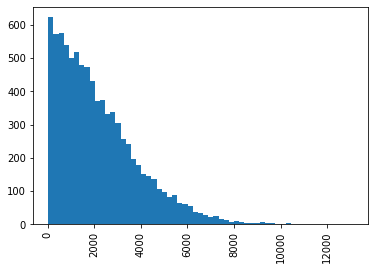

In [37]:
plt.hist(data = df, x = "Item_Outlet_Sales", bins = 'auto')
plt.xticks(rotation = 90)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

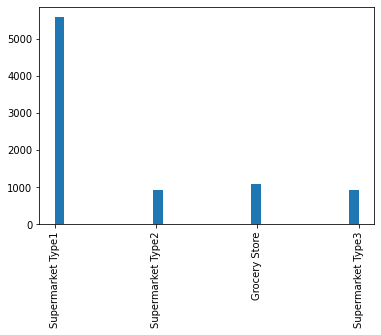

In [38]:
plt.hist(data = df, x = "Outlet_Type", bins = 'auto')
plt.xticks(rotation = 90)

####Boxplots

These boxplots will show the statistical summaries of each numerical value

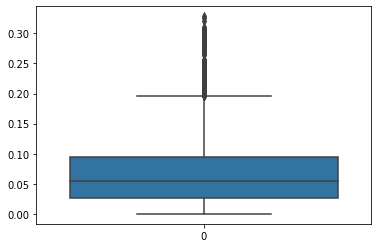

In [39]:
sns.boxplot(data = df['Item_Visibility'])

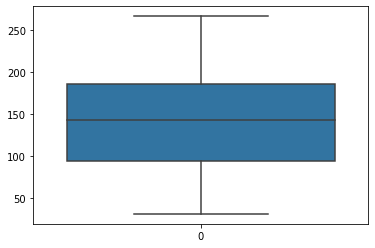

In [40]:
sns.boxplot(data = df['Item_MRP'])

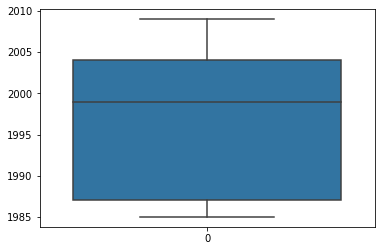

In [41]:
sns.boxplot(data = df['Outlet_Establishment_Year'])

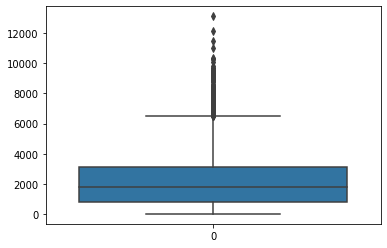

In [42]:
sns.boxplot(data = df['Item_Outlet_Sales'])

####Heatmap

The heatmap will find correlations between numerical values

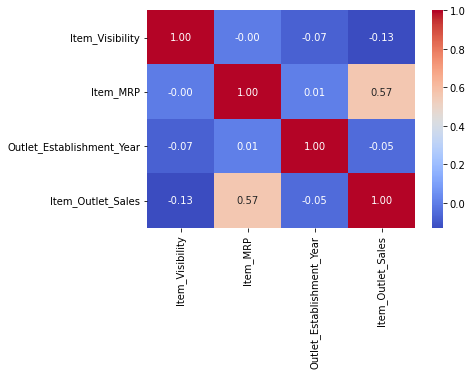

In [43]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

This heatmap shows that item MRP and item sales seem to have a moderate correlation

##Explanatory Visuals

####Sales Over Time

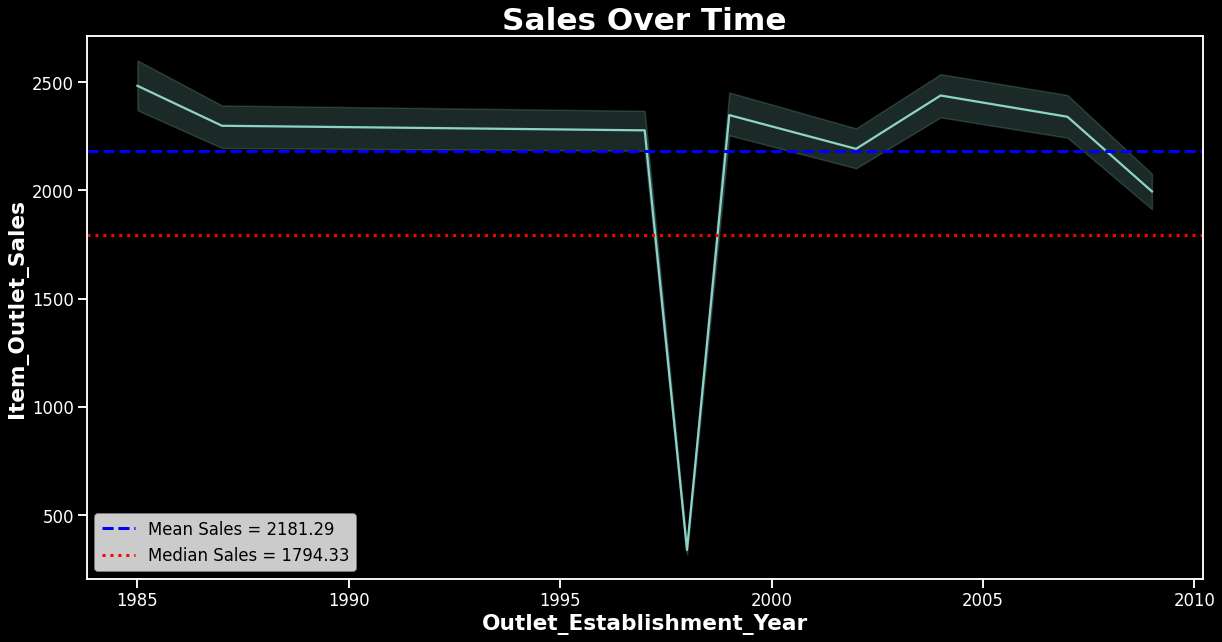

In [100]:
#set plot size and style
with plt.style.context('dark_background'):
  fig, ax = plt.subplots(figsize = (20,10))

#create lineplot and title
  sns.lineplot(data = df, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales')
  sns.set_context('talk')
  ax.set_title('Sales Over Time',
             fontfamily = 'sans',
             fontsize = 'xx-large', 
             fontweight = 'bold');

#change x and y axis font
ax.set_xlabel(ax.xaxis.get_label().get_text(),
    fontsize='large',
    fontweight = 'semibold')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
    fontsize='large',
    fontweight = 'semibold')

#create median and mean lines
mean_sales = df['Item_Outlet_Sales'].mean()
ax.axhline(mean_sales, color = 'b', ls = '--', lw = 3,
           label = f'Mean Sales = {mean_sales:.2f}');

med_sales = df['Item_Outlet_Sales'].median()
ax.axhline(med_sales, color = 'r', ls = ':', lw = 3,
           label = f'Median Sales = {med_sales:.2f}');

#create legend
ax.legend()

This is a graph showing that sales have been consistent in every store except for for the store made in the late 90's, which were much lower. This causes the median sales to be skewed.

####Sales of Different Item Types

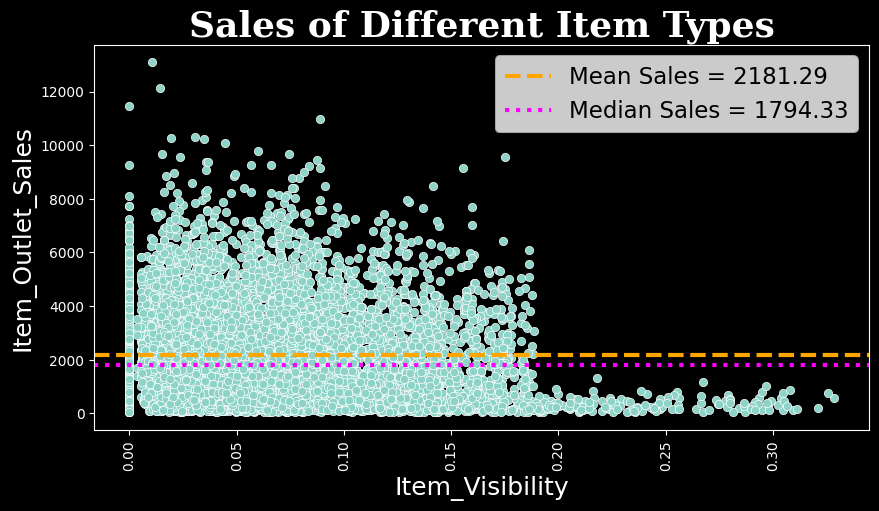

In [99]:
#set plot size and style
with plt.style.context('dark_background','classic'):
  fig, ax = plt.subplots(figsize = (10,5))

#create scatterplot and title
  sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales')
  sns.set_context('talk')
  ax.set_title('Sales of Different Item Types',
             fontfamily = 'serif',
             fontsize = 'x-large', 
             fontweight = 'semibold');
  plt.xticks(rotation = 90)

#change x and y axis font
ax.set_xlabel(ax.xaxis.get_label().get_text(),
    fontsize='medium')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
    fontsize='medium')

#create median and mean lines
mean_sales = df['Item_Outlet_Sales'].mean()
ax.axhline(mean_sales, color = 'orange', ls = '--', lw = 3,
           label = f'Mean Sales = {mean_sales:.2f}');

med_sales = df['Item_Outlet_Sales'].median()
ax.axhline(med_sales, color = 'magenta', ls = ':', lw = 3,
           label = f'Median Sales = {med_sales:.2f}');

#create legend
ax.legend()

There is a very slight negative trend in this graph. Item visibilty does not affect sales much, but it appears that sales drop slightly as visibility rises